In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#print(os.getcwd())

In [3]:
path = "../Data/amstat/babyboom.dat.txt" #set path
labels = ("time of birth","sex","birth weight","min since midnight") #create labels based on description of data
data = pd.read_csv(path,delimiter=" ",header=None) #read data without header and with space as delimiter
#reading data was not optimal, it required manual data handling in thie txt file and manual check of columns of dataframe
#time of birth got read as numbers, so zeros before first non-zero number got deleted
df = pd.DataFrame(data) #create a data frame
#print(len(df))
df = df.iloc[:,[4,11,15,19]] #manually set which columns should be discarded (columns with NaNs)
df.columns=labels #set names of columns
for i in range(len(df)): #for loop to change numerical data into factor (there should be a better way??)
    #print(df.iloc[i,[0]].values)
    if(df[["sex"]][i:i+1].values==1):
        #df[["sex"]][i:i+1] = "f" it won't work because it is trying to save value on a copy of the cell
        df.iloc[i,[1]] = "f"
    else:
        df.iloc[i,[1]] = "m"
print(df)

    time of birth sex  birth weight  min since midnight
0               5   f          3837                   5
1             104   f          3334                  64
2             118   m          3554                  78
3             155   m          3838                 115
4             257   m          3625                 177
5             405   f          2208                 245
6             407   f          1745                 247
7             422   m          2846                 262
8             431   m          3166                 271
9             708   m          3520                 428
10            735   m          3380                 455
11            812   m          3294                 492
12            814   f          2576                 494
13            909   f          3208                 549
14           1035   m          3521                 635
15           1049   f          3746                 649
16           1053   f          3523             

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5216\1853341186.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'f' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,[1]] = "f"


In [4]:
#grouping data by sex and basic statistic for grouped data
grouped_sex = df.iloc[:,[1,2,3]] #we get rid of birth time for this analysis
grouped_sex = grouped_sex.groupby("sex") #group data by factor
print(grouped_sex.describe()) #print basic statistics
#help(pd.DataFrame.describe)

    birth weight                                                            \
           count         mean         std     min     25%     50%      75%   
sex                                                                          
f           18.0  3132.444444  631.582534  1745.0  2711.0  3381.0  3517.25   
m           26.0  3375.307692  428.046051  2121.0  3198.0  3404.0  3628.75   

            min since midnight                                               \
        max              count        mean         std   min     25%    50%   
sex                                                                           
f    3866.0               18.0  773.000000  446.050775   5.0  507.75  846.5   
m    4162.0               26.0  799.615385  402.687281  78.0  464.25  849.5   

                      
         75%     max  
sex                   
f    1094.25  1435.0  
m    1177.50  1283.0  


f         Axes(0.1,0.15;0.363636x0.75)
m    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

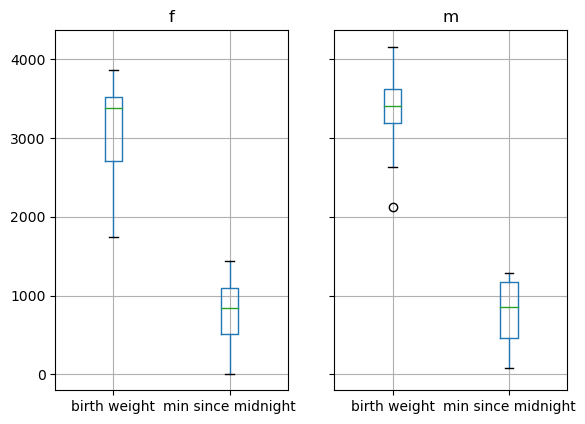

In [5]:
#boxplot for data grouped by sex
grouped_sex.boxplot()

c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: ylabel='Count'>

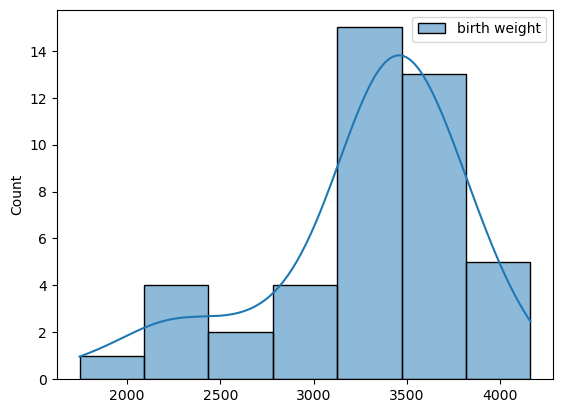

In [6]:
#histogram with density function for birth weight
sns.histplot(df[["birth weight"]],kde=True,bins=7)

c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: ylabel='Count'>

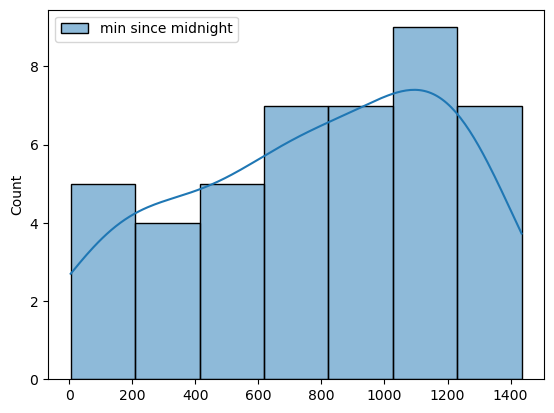

In [7]:
#histogram with density function for time since midnight
sns.histplot(df[["min since midnight"]],kde=True)

c:\Users\lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  

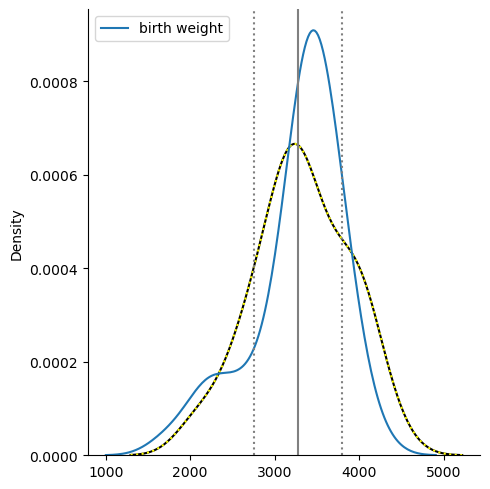

In [22]:
#comparison with normal distribution
mean = np.average(df[["birth weight"]])
std = np.std(df[["birth weight"]]).values
normal = np.random.normal(mean,std,len(df))
#plot normal distribution function with average, standard deviation and number of observations of our data
sns.displot(normal,kind="kde",color="black") 
sns.kdeplot(normal,color="yellow",linestyle="dotted")
sns.kdeplot(df[["birth weight"]]) #plot distribution function of our data
#help(plt.vlines)
#plot lines showcasing mean and std of data
plt.axvline(x=mean,color="grey")
plt.axvline(x=mean-std,color="grey",ls="dotted")
plt.axvline(x=mean+std,color="grey",ls="dotted")
#plt.vlines(mean,0,1)
#plt.vlines([mean-std,mean+std],0,1,linestyles="dotted")

c:\Users\lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  

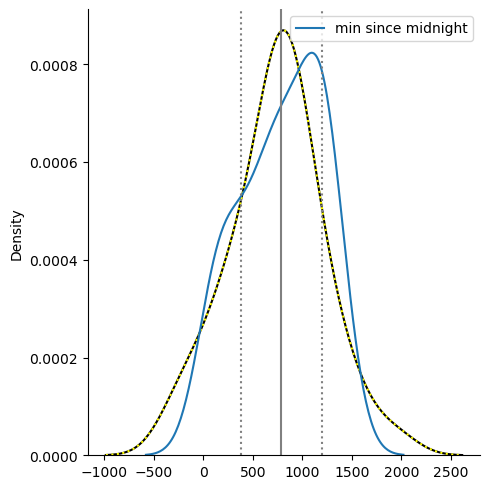

In [25]:
#comparison with normal distribution
mean = np.average(df[["min since midnight"]])
std = np.std(df[["min since midnight"]]).values
normal = np.random.normal(mean,std,len(df))
#plot normal distribution function with average, standard deviation and number of observations of our data
sns.displot(normal,kind="kde",color="black") 
sns.kdeplot(normal,color="yellow",linestyle="dotted")
sns.kdeplot(df[["min since midnight"]]) #plot distribution function of our data
#help(plt.vlines)
#plot lines showcasing mean and std of data
plt.axvline(x=mean,color="grey")
plt.axvline(x=mean-std,color="grey",ls="dotted")
plt.axvline(x=mean+std,color="grey",ls="dotted")